<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/dataset3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv("/content/sample_data/youtubers_df.csv")
print(df)

     Rank          Username           Categories   Suscribers         Country  \
0       1           tseries       Música y baile  253500000.0           India   
1       2           MrBeast   Videojuegos, Humor  210100000.0  Estados Unidos   
2       3         CoComelon            Educación  168100000.0         Unknown   
3       4          SETIndia                  NaN  165400000.0           India   
4       5     KidsDianaShow  Animación, Juguetes  116500000.0         Unknown   
..    ...               ...                  ...          ...             ...   
995   996       morharyanvi       Música y baile   12300000.0           India   
996   997  UTKARSHCLASSES13            Educación   12300000.0           India   
997   998         MBCMASRtv                  NaN   12300000.0          Egipto   
998   999               NFL             Deportes   12300000.0  Estados Unidos   
999  1000        MykeTowers       Música y baile   12300000.0        Colombia   

         Visits      Likes 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   object 
 1   Username    1000 non-null   object 
 2   Categories  676 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [ ]:
df.describe()

,Suscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.260980e+07,1.063825e+06,4.917148e+04,1866.295000
std,1.733998e+07,3.729356e+06,2.107156e+05,20503.291953
min,1.230000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.430000e+07,3.310000e+04,4.792500e+02,3.000000
50%,1.730000e+07,1.932000e+05,3.400000e+03,70.000000
75%,2.442500e+07,8.844500e+05,3.080000e+04,458.250000
max,2.535000e+08,9.540000e+07,5.400000e+06,532000.000000


In [ ]:
print(df.ndim)
print(df.shape)
print(df.dtypes)

2
(1000, 9)
Rank           object
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object


<Axes: >

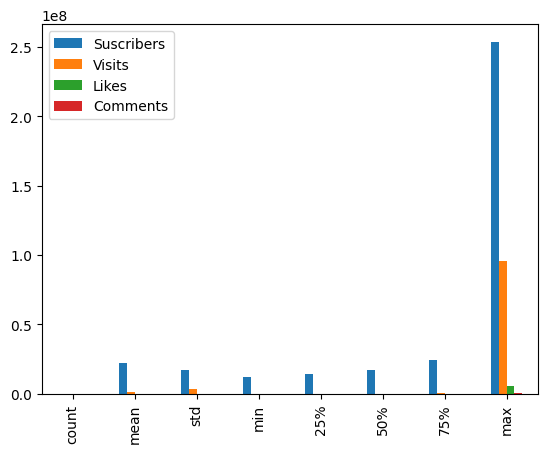

In [ ]:
df.describe().plot(kind = "bar")

In [ ]:
df.isnull().sum()

,0
Rank,0
Username,0
Categories,324
Suscribers,0
Country,0
Visits,0
Likes,0
Comments,0
Links,0


In [ ]:
df['Categories'] = df['Categories'].fillna(df['Categories'].mode()[0])
df.isnull().sum()

,0
Rank,0
Username,0
Categories,0
Suscribers,0
Country,0
Visits,0
Likes,0
Comments,0
Links,0


In [ ]:
df.head()
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,morharyanvi,Música y baile,12300000.0,India,168900.0,3800.0,784.0,http://youtube.com/channel/UC_Rh_RLrouZHPf2vUF...
996,997,UTKARSHCLASSES13,Educación,12300000.0,India,20100.0,1300.0,47.0,http://youtube.com/channel/UCLuBF4Xr1-BIpcpFFm...
997,998,MBCMASRtv,Música y baile,12300000.0,Egipto,2300.0,40.0,4.0,http://youtube.com/channel/UCnFKsbAof9fRv614I4...
998,999,NFL,Deportes,12300000.0,Estados Unidos,26000.0,604.0,53.0,http://youtube.com/channel/UCDVYQ4Zhbm3S2dlz7P...
999,1000,MykeTowers,Música y baile,12300000.0,Colombia,96100.0,3400.0,128.0,http://youtube.com/channel/UCLk8IJ1TwI7Xl7UUfA...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Suscribers'], axis=1),
    df['Suscribers'],
    test_size=0.3,
    random_state=0
)


In [ ]:
const_features = [
    col for col in X_train.select_dtypes(include=np.number).columns
    if X_train[col].std() == 0
]
len(const_features)
X_train.drop(columns=const_features, inplace=True)
X_test.drop(columns=const_features, inplace=True)


In [ ]:
import numpy as np

# Detect quasi-constant features (>= 99.9% same value)
quasi_const_fea = []
for col in X_train.columns:
    predominant = (X_train[col].value_counts() / float(len(X_train))).sort_values(ascending=False).values[0]
    if predominant >= 0.999:
        quasi_const_fea.append(col)

print(f"Number of quasi-constant features: {len(quasi_const_fea)}")
print("Quasi-constant features:", quasi_const_fea)

# Remove them
X_train.drop(columns=quasi_const_fea, inplace=True)
X_test.drop(columns=quasi_const_fea, inplace=True)


Number of quasi-constant features: 0
Quasi-constant features: []


In [ ]:
duplicated_fea = []

for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for col2 in X_train.columns[i+1:]:
        if X_train[col1].equals(X_train[col2]):
            duplicated_fea.append(col2)

print(f"Duplicated features: {duplicated_fea}")

# Remove duplicates from both train and test
X_train.drop(columns=duplicated_fea, inplace=True)
X_test.drop(columns=duplicated_fea, inplace=True)
X_train = X_train.drop(columns=['Username'])
X_test = X_test.drop(columns=['Username'])
X_train = X_train.drop(columns=[ 'Links'])
X_test = X_test.drop(columns=['Links'])


Duplicated features: []


In [ ]:
import pandas as pd
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns so train and test match
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)
print(X_train_encoded.shape)
print(X_test_encoded.shape )

(700, 769)
(300, 769)


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 61655 (\uf0d7) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 61656 (\uf0d8) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 61656 (\uf0d8) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 61655 (\uf0d7) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


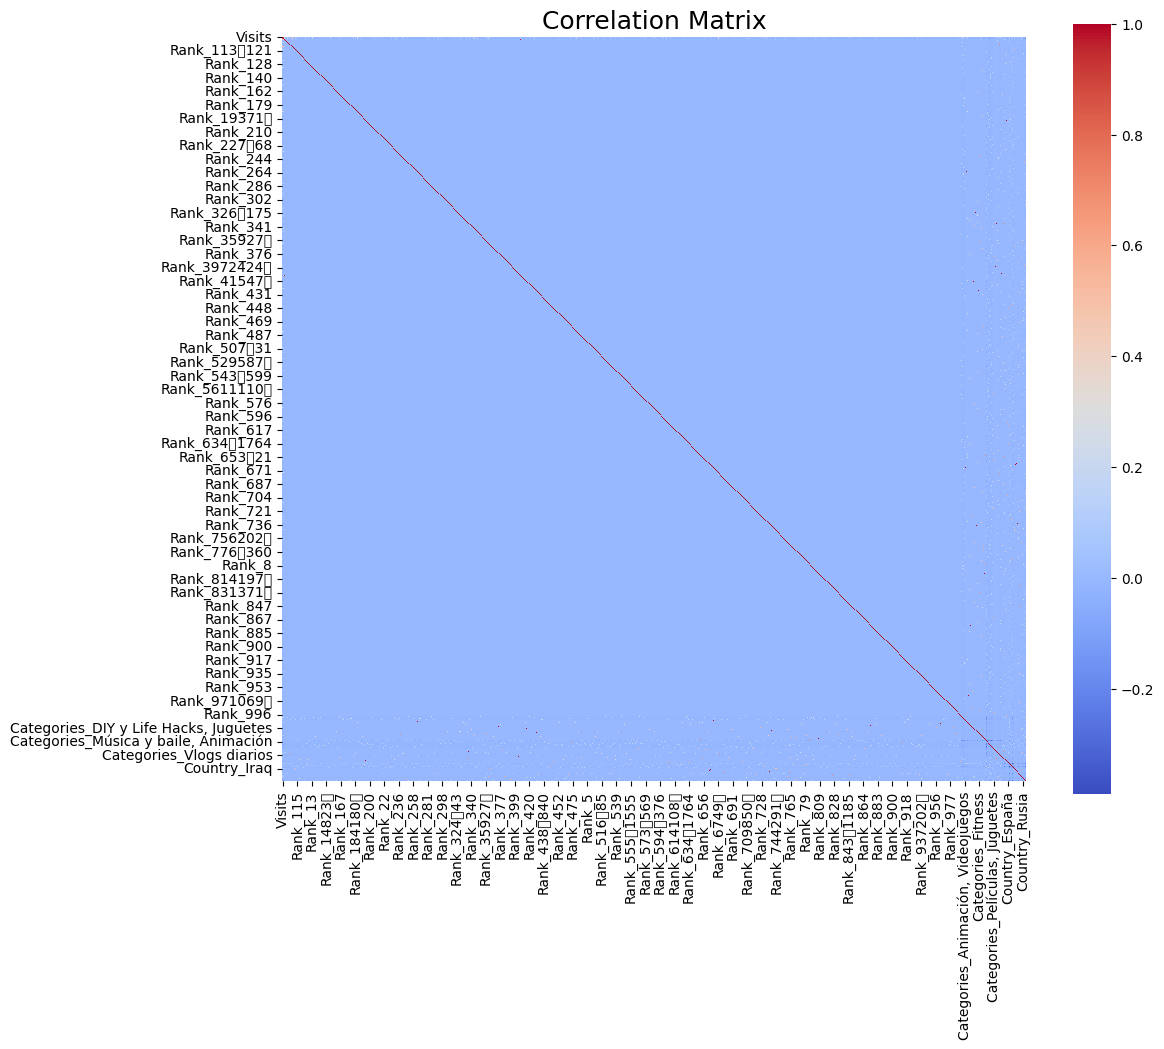

In [ ]:
corrmat = X_train_encoded.corr().round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(corrmat, cmap='coolwarm', annot=False, square=True, cbar=True)
plt.title("Correlation Matrix", fontsize=18)
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
import pandas as pd


y = df['Suscribers']  # target variable
X = df.drop(columns=['Suscribers', 'Username', 'Links'])  # drop ID-like columns

from sklearn.preprocessing import LabelEncoder
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

mi_scores = mutual_info_regression(X_encoded, y)  # regression target

mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print(mi_df)


      Feature  MI Score
0        Rank  3.749612
2     Country  0.016419
3      Visits  0.003139
4       Likes  0.001240
1  Categories  0.000000
5    Comments  0.000000
